### Treść zadania

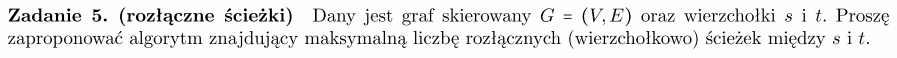

### Omówienie algorytmu

###### Przekształacanie grafu
Spójrzmy najpierw na nieco bardziej powszechny problem, czyli szukanie liczby rozłącznych krawędziowo ścieżek. Szukanie maksymalnej liczby rozłącznych krawędziowo ścieżek jest równoznaczne ze znalezieniem minimalnego przekroju w grafie, w którym każdej z krawędzi przypisujemy wagę równą $ 1 $ (przypisujemy wagę jednostkową, aby otrzymany przepływ był równoznaczny z liczbą krawędzi, jakie zostały wliczone do rozwiązania i, żeby otrzymać prawidłowy przepływ - wagi $ 1 $ imitują graf nieważony). Możemy wówczas zastosować dowolny algorytm, który znajduje maksymalny przepływ w grafie skierowanym.
###### Dlaczego to działa?
Algorytm działa prawidłowo z tego względu, że po takiej modyfikacji przez wierzchołek może przepłynąć dokładnie jedna jednostka pływu. Wcześniej, nawet jeżeli byśmy przypisali wagi krawędziom równe $ 1 $, to znaleźlibyśmy maksymalną liczbę ścieżek rozłącznych krawędziowo, a nie wierzchołkowo, bo przez wierzchołek mogłaby wówczas przepływać dowolna ilość pływu. Spójrzmy na przykład:
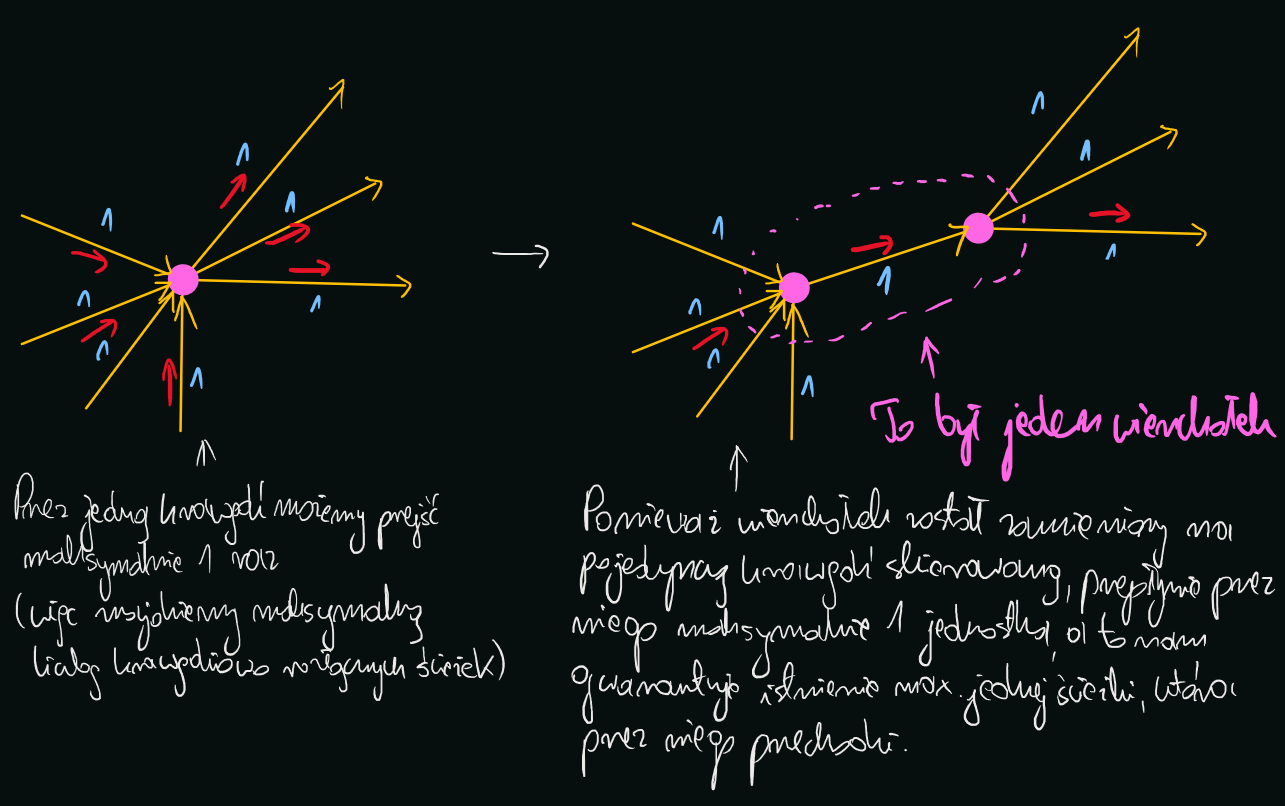
###### Jak rozdzielamy wierzchołki?
Zakładam, że graf, jaki otrzymujemy na wejściu, jest reprezentowany przez listy sąsiedztwa. Wówczas, aby modyfikacja była możliwie najszybsza, najlepszym rozwiązaniem jest dodanie nowego wierzchołka do listy wierzchołków, a następnie odpięcie całej listy krawędzi, które wychodzą z rozdzielanego wierzchołka (operacja w czasie $ O(1) $, bo odpinamy całą listę na raz) i wpięcie jej jako listę sąsiadów dodanego wierzchołka. (niestety, jeżeli na wejściu dustajemy graf nieważony, musimy i tak zamienić każdą z krawędzi na krawędź ważoną, więc i tak przejdziemy przez cały graf i zmodyfikujemy każdy element z list sąsiedztwa. Z tego powodu jednak chyba lepiej jest utworzyć nowy graf, bo złożoność będzie taka sama, a nie będziemy musieli psuć grafu wejściowego). Następnie dodajemy tylko jedną krawędź skierowaną od wierzchołka, któremu odpięliśmy sąsiadow do dodanego wierzchołka. Dodatkowo zakładam, że otrzymujemy na wejściu graf z wagami krawędzi równymi $ 1 $. Choć nie jest to powiedziane, to chodzi nam o maksymalną liczbę ścieżek wewnętrznie rozłącznych wierzchołkowo, czyli źródło i ujście są wspólne (inaczej zadanie nie miało by sensu, bo maksymalna liczba rozłącznych wierzchołkowo ścieżek przy ustalonym wierzchołku początkowym $ s $ i końcowym $ t $ wynosi zawsze $ 1 $ ($ 1 $, gdy da się dotrzeć z $ s $ do $ t $ i $ 0 $, jeśli się nie da. Jeżeli jednak szukalibyśmy największej liczby rozłącznych wierzchołkowo ścieżek w cąłym grafie, to problem jest równoważny znalezieniu maksymalnego skojarzenia - to tylko na razie potrafimy robić dla grafów dwudzielnych). Z tego względu, modyfikacji nie poddajemy wierzchołka, który jest źródłem ani wierzchołka, który jest ujściem.
###### Opis rozwiązania:
https://math.stackexchange.com/questions/1522329/linear-programming-find-the-maximum-number-of-vertex-disjoint-paths-in-a-direct
###### Opis rozwiązania bardziej skomplikowanego - dla grafów nieskierowanych:
https://stackoverflow.com/questions/11915742/shortest-two-disjoint-paths-two-sources-and-two-destinations/11916273#11916273
###### UWAGA
Dla grafów nieskierowanych możemy również postąpić podobnie jak dla grafów skierowanych. Konieczne jest jednak przekształcenie każdego z wierzchołków na krawędź skierwaną w obie strony, a następnie rozdzielenie jednej z dwóch krawędzi, które łączą parę wierzchołków $ u, v $ sztucznym wierzchołkiem (tak, jak to robiliśmy, chcąc użyć algorytmu maksymalnego przepływu dla grafów nieskierowanych). Wówczas podobnie jak wyżej, mamy pewność, że przez jeden wierzchołek (rozumiany jako wierzchołek przekształcony na krawędzie) przepłynie maksymalnie jedna jednostka przepływu (w jedną lub w drugą stronę). Dzięki temu, podobnie jak wyżej, mamy zagwarantowane, że nie istnieją 2 ścieżki, które posiadają wspólne wierzchołki.

### Złożoność

Zależna od użytego algorytmu do znajdowania maksymalnego przepływu. Ja używam algorytmu Forda-Fulkersona, ponieważ wartość maksymalnego przepływu jest zależna od liczby wierzchołków w wejściowym grafie: $ f^* = O(V) $, więc otrzymujemy finalnie $ O((V + E) \cdot f^*) = O((V + E) \cdot V) $
###### Obliczeniowa:
$ O((V + E) \cdot V) $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [1]:
def map_graph(G: 'graph represented by adjaceny lists', s: 'source', t: 'target'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    
    for u in range(n):
        if u != s and u != t:
            G2.append([])
            for v in G[u]:
                G2[n].append((v, 1))
            G2[u].append((n, 1))
            n += 1
        else:
            for v in G[u]:
                G2[u].append((v, 1))
            
    return G2
        

def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v = G[u][i][0]
            G[v].append((u, 0))  # Add an edge with no weight


def ford_fulkerson(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    flow     = [[0] * n for _ in range(n)]
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    
    add_back_edges(G)
    
    def dfs(u):
        visited[u] = token
        
        if u == t: return 1
        
        for v, capacity in G[u]:
            remaining = capacity - flow[u][v]
            if visited[v] != token and remaining == 1:
                if dfs(v):
                    flow[u][v] += 1
                    flow[v][u] -= 1
                    return 1
        return 0
    
    while True:
        if not dfs(s): break
        token += 1
        
    return token - 1


def vertex_disjoint_paths(G: 'graph represented by adjaceny lists', s: 'source', t: 'target'):
    G2 = map_graph(G, s, t)
    return ford_fulkerson(G2, s, t)

###### Kilka testów

##### Pomocnicze

In [2]:
def directed_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append(e[1])
    return G

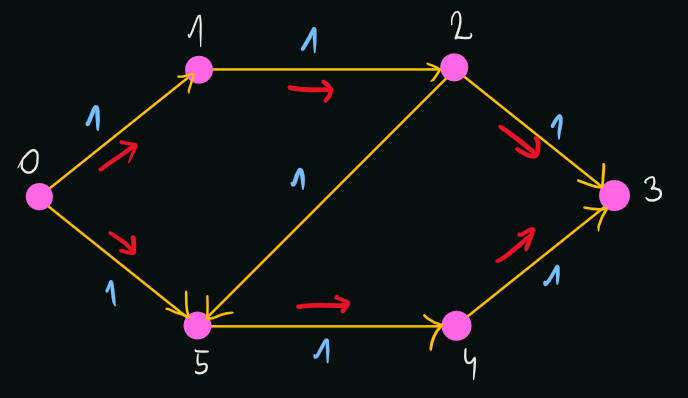

In [3]:
E = [(0, 1), (0, 5), (1, 2), (5, 4), (2, 5), (4, 3), (2, 3)]
G = directed_graph_list(E)

s = 0
t = 3

print(vertex_disjoint_paths(G, s, t))

2


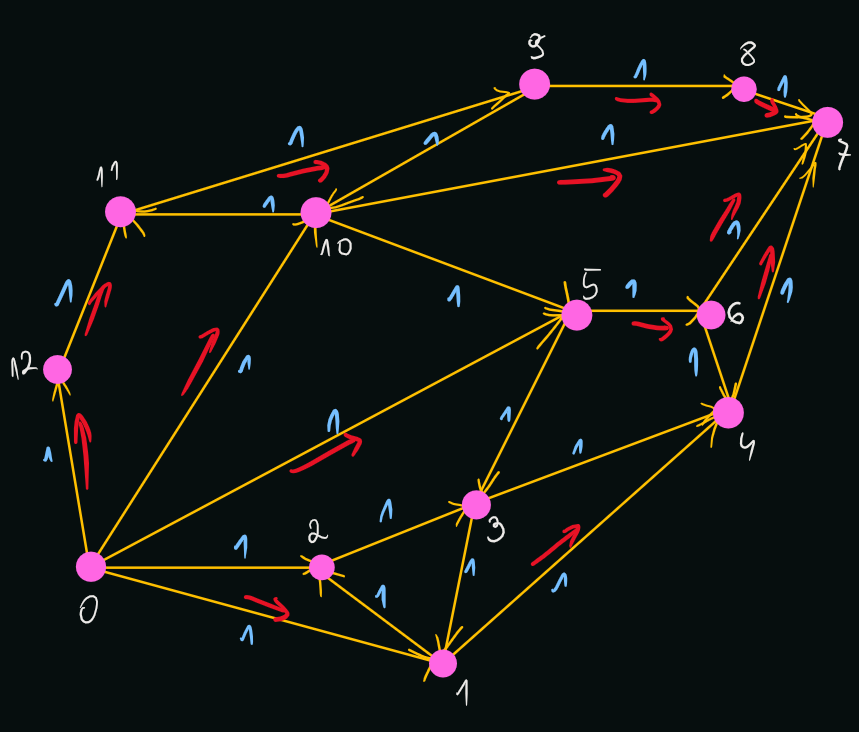

In [4]:
E = [(0, 1), (0, 2), (0, 5), (0, 10), (0, 12), (1, 4), (1, 2), (2, 3), (3, 1), (3, 4), (4, 7),
     (5, 6), (5, 3), (6, 4), (6, 7), (8, 7), (9, 8), (10, 5), (10, 11), (10, 7), (11, 9), 
     (12, 11), (9, 10)]

G = directed_graph_list(E)

s = 0
t = 7

print(vertex_disjoint_paths(G, s, t))

4


### (Dodatkowo) Odtwarzanie znalezionych ścieżek

In [5]:
def map_graph(G: 'graph represented by adjaceny lists', s: 'source', t: 'target'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    
    for u in range(n):
        if u != s and u != t:
            G2.append([])
            for v in G[u]:
                G2[n].append((v, 1))
            G2[u].append((n, 1))
            n += 1
        else:
            for v in G[u]:
                G2[u].append((v, 1))
            
    return G2
        

def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v = G[u][i][0]
            G[v].append((u, 0))  # Add an edge with no weight


def ford_fulkerson(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    flow     = [[0] * n for _ in range(n)]
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    
    add_back_edges(G)
    
    def dfs(u):
        visited[u] = token
        
        if u == t: return 1
        
        for v, capacity in G[u]:
            remaining = capacity - flow[u][v]
            if visited[v] != token and remaining == 1:
                if dfs(v):
                    flow[u][v] += 1
                    flow[v][u] -= 1
                    return 1
        return 0
    
    while True:
        if not dfs(s): break
        token += 1
        
    return token - 1, flow


def get_paths(G: 'mapped graph',
              flow: 'array of flow amounts returned by max-flow finding algorithm', 
              s: 'source', 
              t: 'target', 
              n: 'number of vertices in the original graph'):
    paths = []
    path = []
    
    m = len(G)
    visited = [False] * m
    
    def dfs(u):
        visited[u] = True
        if u < n:
            path.append(u)
        
        for v, weight in G[u]:
            if weight == 1 and flow[u][v] == 1:
                if v == t:
                    path.append(t)
                    paths.append(path[:])
                    path.pop()
                elif not visited[v]:
                    dfs(v)
        
        if u < n:
            path.pop()
    
    dfs(s)
    
    return paths


def vertex_disjoint_paths(G: 'graph represented by adjaceny lists', s: 'source', t: 'target'):
    G2 = map_graph(G, s, t)
    count, flow = ford_fulkerson(G2, s, t)
    return (0, []) if not count else (count, get_paths(G2, flow, s, t, len(G)))

###### Kilka testów

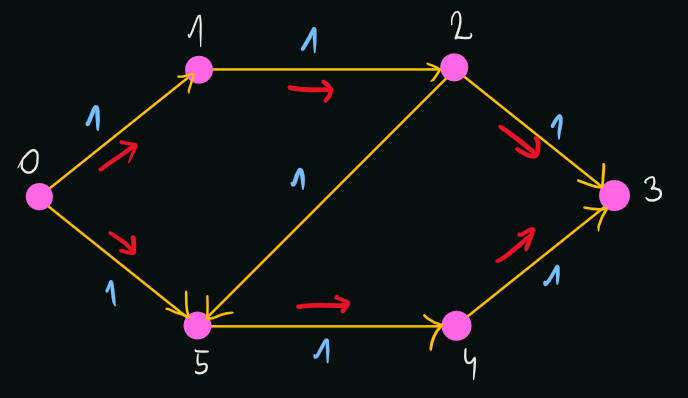

In [6]:
E = [(0, 1), (0, 5), (1, 2), (5, 4), (2, 5), (4, 3), (2, 3)]
G = directed_graph_list(E)

s = 0
t = 3

print(vertex_disjoint_paths(G, s, t))

(2, [[0, 1, 2, 3], [0, 5, 4, 3]])


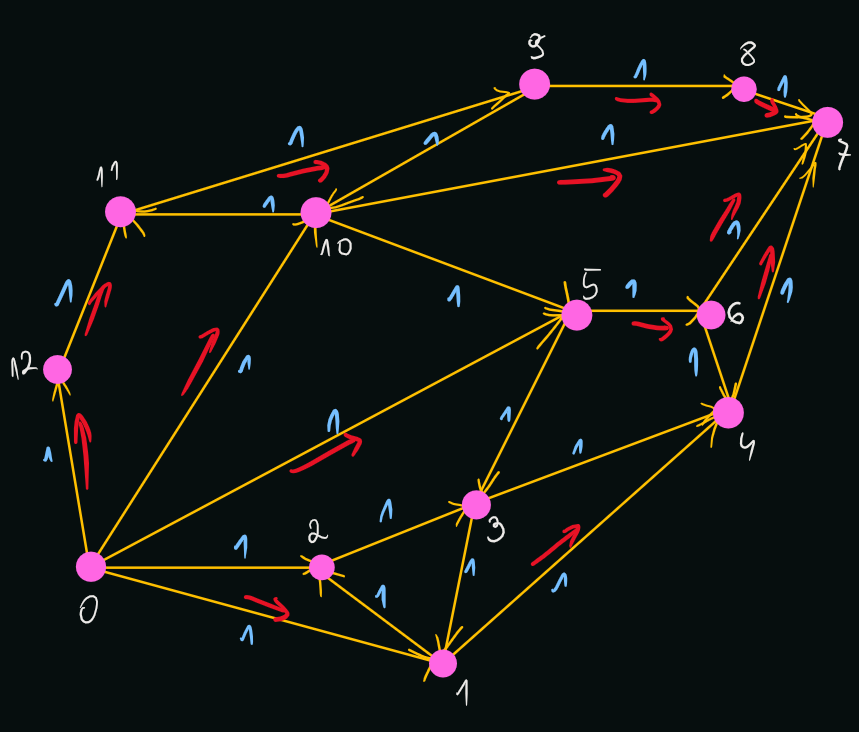

In [7]:
E = [(0, 1), (0, 2), (0, 5), (0, 10), (0, 12), (1, 4), (1, 2), (2, 3), (3, 1), (3, 4), (4, 7),
     (5, 6), (5, 3), (6, 4), (6, 7), (8, 7), (9, 8), (10, 5), (10, 11), (10, 7), (11, 9), 
     (12, 11), (9, 10)]

G = directed_graph_list(E)

s = 0
t = 7

print(vertex_disjoint_paths(G, s, t))

(4, [[0, 1, 4, 7], [0, 5, 6, 7], [0, 10, 7], [0, 12, 11, 9, 8, 7]])


### (Dodatkowo) Dla grafów nieskierowanych z odtwarzaniem ścieżki

In [8]:
def map_graph(G: 'graph represented by adjaceny lists', s: 'source', t: 'target'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    
    for u in range(n):
        if u != s and u != t:
            G2.append([])
            m = n + 1
            for v in G[u]:
                # Split an edge in half if v < u
                if v < u:
                    G2.append([])
                    G2[n].append((m, 1))
                    G2[m].append((v, 1))
                    m += 1
                else:
                    G2[n].append((v, 1))
            # Add an undirected edge 
            G2[u].append((n, 1))
            n = m
        else:
            # Add only outgoing edges for the source and
            # ingoing edges to the sink
            for v in G[u]:
                G2[u].append((v, 1))
            
    return G2
        

def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v = G[u][i][0]
            G[v].append((u, 0))  # Add an edge with no weight


def ford_fulkerson(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    
    add_back_edges(G)
    
    def dfs(u):
        visited[u] = token
        
        if u == t: return 1
        
        for v, capacity in G[u]:
            remaining = capacity - flow[u][v]
            if visited[v] != token and remaining == 1:
                if dfs(v):
                    flow[u][v] += 1
                    flow[v][u] -= 1
                    return 1
        return 0
    
    while True:
        if not dfs(s): break
        token += 1
        
    return token - 1, flow


def get_paths(G: 'mapped graph',
              flow: 'array of flow amounts returned by max-flow finding algorithm', 
              s: 'source', 
              t: 'target', 
              n: 'number of vertices in the original graph'):
    paths = []
    path = []
    
    m = len(G)
    visited = [False] * m
    
    def dfs(u):
        visited[u] = True
        if u < n:
            path.append(u)
        
        for v, weight in G[u]:
            if weight == 1 and flow[u][v] == 1:
                if v == t:
                    path.append(t)
                    paths.append(path[:])
                    path.pop()
                elif not visited[v]:
                    dfs(v)
        
        if u < n:
            path.pop()
    
    dfs(s)
    
    return paths


def vertex_disjoint_paths(G: 'graph represented by adjaceny lists', s: 'source', t: 'target'):
    G2 = map_graph(G, s, t)
    count, flow = ford_fulkerson(G2, s, t)
    return (0, []) if not count else (count, get_paths(G2, flow, s, t, len(G)))

###### Kilka testów

##### Pomocnicze

In [9]:
def undirected_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append(e[1])
        G[e[1]].append(e[0])
    return G

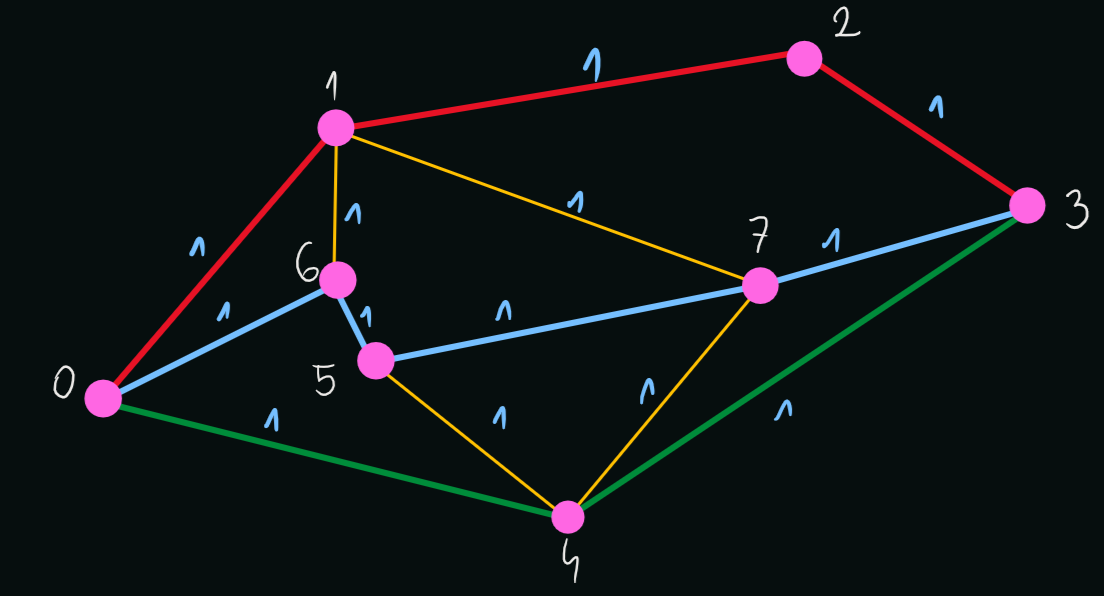

In [10]:
E = [(0, 1), (6, 0), (0, 4), (4, 5), (6, 5), (6, 1), (1, 7), 
     (7, 4), (4, 3), (3, 7), (1, 7), (1, 2), (2, 3), (5, 7)]

G = undirected_graph_list(E)

s = 0
t = 3

print(vertex_disjoint_paths(G, s, t))

(3, [[0, 1, 2, 3], [0, 6, 5, 7, 3], [0, 4, 3]])
